<a href="https://colab.research.google.com/github/sathwik1404/deeplearning/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/3
157/157 [==============================] - 73s 431ms/step - loss: 0.6818 - accuracy: 0.5687 - val_loss: 0.6490 - val_accuracy: 0.6380
Epoch 2/3
157/157 [==============================] - 57s 366ms/step - loss: 0.4592 - accuracy: 0.7939 - val_loss: 0.4495 - val_accuracy: 0.7930
Epoch 3/3
196/196 [==============================] - 5s 23ms/step - loss: 0.4766 - accuracy: 0.8124
Epoch 1/3
157/157 [==============================] - 29s 169ms/step - loss: 0.5051 - accuracy: 0.7339 - val_loss: 0.3399 - val_accuracy: 0.8524
Epoch 2/3
157/157 [==============================] - 20s 126ms/step - loss: 0.2552 - accuracy: 0.8985 - val_loss: 0.3091 - val_accuracy: 0.8714
Epoch 3/3
196/196 [==============================] - 1s 6ms/step - loss: 0.3385 - accuracy: 0.8564
Epoch 1/3
157/157 [==============================] - 28s 163ms/step - loss: 0.4792 - accuracy: 0.7628 - val_loss: 0.3450 - val_accuracy: 0.8522
Epoch 2/3
157/15

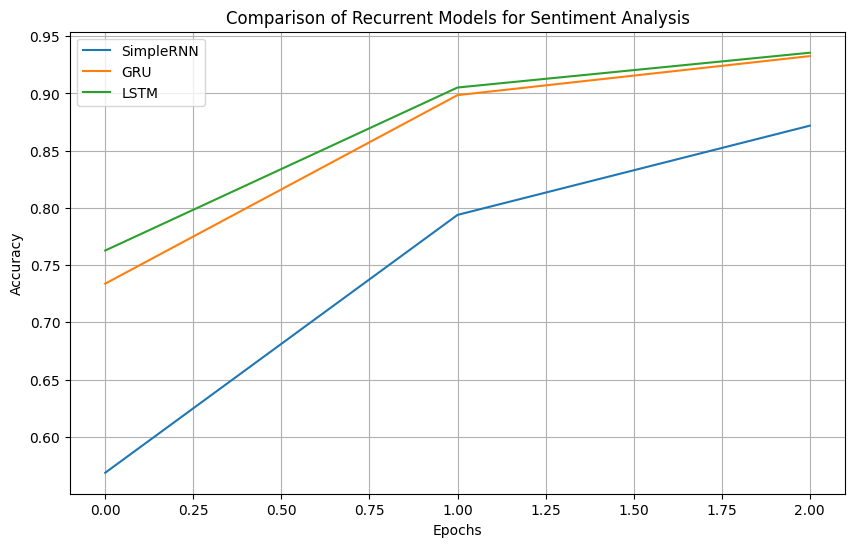

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.preprocessing import sequence

max_words = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

max_length = 250
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

accuracies = []

model_names = ["SimpleRNN", "GRU", "LSTM"]
models = [
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        SimpleRNN(64),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        GRU(64),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
]

batch_size = 128
epochs = 3

histories = []

for model in models:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    histories.append(history)
    _, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    accuracies.append(round(accuracy,1))

plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=model_names[i])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Recurrent Models for Sentiment Analysis')
plt.legend()
plt.grid(True)
plt.show()